<a href="https://colab.research.google.com/github/Boudia27/Projects/blob/main/project_3_Diabetes_Health_Indicators_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Define the file paths
file_paths = [
    r'/content/drive/MyDrive/Projects/project_3_Diabetes_Health_Indicators_Dataset/diabetes_012_health_indicators_BRFSS2015.csv',
    r'/content/drive/MyDrive/Projects/project_3_Diabetes_Health_Indicators_Dataset/diabetes_binary_5050split_health_indicators_BRFSS2015.csv',
    r'/content/drive/MyDrive/Projects/project_3_Diabetes_Health_Indicators_Dataset/diabetes_binary_health_indicators_BRFSS2015.csv'
]

# Create an empty list to store the dataframes
dataframes = []

# Read each CSV file and append its dataframe to the list
for file_path in file_paths:
    df = pd.read_csv(file_path)
    dataframes.append(df)

# Concatenate all dataframes into a single dataframe
combined_df = pd.concat(dataframes)

# Print the combined dataframe
print(combined_df)


        Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1                0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2                0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3                0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4                0.0     1.0       1.0        1.0  24.0     0.0     0.0   
...              ...     ...       ...        ...   ...     ...     ...   
253675           NaN     1.0       1.0        1.0  45.0     0.0     0.0   
253676           NaN     1.0       1.0        1.0  18.0     0.0     0.0   
253677           NaN     0.0       0.0        1.0  28.0     0.0     0.0   
253678           NaN     1.0       0.0        1.0  23.0     0.0     0.0   
253679           NaN     1.0       1.0        1.0  25.0     0.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  ...  NoDocbcCost  GenHlth  \
0                 

In [ ]:
print(combined_df.head())

   Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0           0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1           0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3           0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4           0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  NoDocbcCost  GenHlth  \
0                   0.0           0.0     0.0  ...          0.0      5.0   
1                   0.0           1.0     0.0  ...          1.0      3.0   
2                   0.0           0.0     1.0  ...          1.0      5.0   
3                   0.0           1.0     1.0  ...          0.0      2.0   
4                   0.0           1.0     1.0  ...          0.0      2.0   

   MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  Income  Diabetes_binary  
0      18.0      15.0       1.0  0.0   9.

In [ ]:
print(combined_df.columns)

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'Diabetes_binary'],
      dtype='object')


In [ ]:
print(combined_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 578052 entries, 0 to 253679
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                578052 non-null  float64
 2   HighChol              578052 non-null  float64
 3   CholCheck             578052 non-null  float64
 4   BMI                   578052 non-null  float64
 5   Smoker                578052 non-null  float64
 6   Stroke                578052 non-null  float64
 7   HeartDiseaseorAttack  578052 non-null  float64
 8   PhysActivity          578052 non-null  float64
 9   Fruits                578052 non-null  float64
 10  Veggies               578052 non-null  float64
 11  HvyAlcoholConsump     578052 non-null  float64
 12  AnyHealthcare         578052 non-null  float64
 13  NoDocbcCost           578052 non-null  float64
 14  GenHlth               578052 non-null  float64
 15  

# Clean Data

In [ ]:
# Check the columns in the combined dataframe
print("Columns in the combined dataframe:")
print(combined_df.columns)

# Separate train and test data
train_df = combined_df.sample(frac=0.7, random_state=42)  # 70% for training
test_df = combined_df.drop(train_df.index)  # Remaining 30% for testing

# Check if train and test data have the same columns
if set(train_df.columns) == set(test_df.columns):
    print("Train and test data have the same columns.")
else:
    print("Train and test data do not have the same columns.")


Columns in the combined dataframe:
Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'Diabetes_binary'],
      dtype='object')
Train and test data have the same columns.


In [ ]:
# Print the train dataframe
print("Train dataframe:")
print(train_df)


Train dataframe:
        Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
78429            0.0     1.0       1.0        1.0  31.0     0.0     0.0   
110190           0.0     0.0       1.0        1.0  29.0     1.0     0.0   
80144            0.0     0.0       0.0        1.0  25.0     0.0     0.0   
92489            NaN     0.0       0.0        1.0  23.0     0.0     0.0   
240946           NaN     1.0       1.0        1.0  28.0     0.0     0.0   
...              ...     ...       ...        ...   ...     ...     ...   
222640           0.0     0.0       0.0        1.0  25.0     0.0     0.0   
7718             NaN     0.0       0.0        1.0  31.0     0.0     0.0   
22253            NaN     1.0       0.0        1.0  20.0     1.0     0.0   
8086             NaN     1.0       0.0        1.0  22.0     0.0     0.0   
66614            NaN     1.0       1.0        1.0  33.0     0.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  ...  NoDocbcCost  GenHlth  \
7

In [ ]:
# Check the count of missing values in the train dataframe
print("Count of missing values in the train dataframe:")
print(train_df.isnull().sum())


Count of missing values in the train dataframe:
Diabetes_012            227103
HighBP                       0
HighChol                     0
CholCheck                    0
BMI                          0
Smoker                       0
Stroke                       0
HeartDiseaseorAttack         0
PhysActivity                 0
Fruits                       0
Veggies                      0
HvyAlcoholConsump            0
AnyHealthcare                0
NoDocbcCost                  0
GenHlth                      0
MentHlth                     0
PhysHlth                     0
DiffWalk                     0
Sex                          0
Age                          0
Education                    0
Income                       0
Diabetes_binary         177533
dtype: int64


In [ ]:
# Check the count of missing values in the test dataframe
print("Count of missing values in the test dataframe:")
print(test_df.isnull().sum())


Count of missing values in the test dataframe:
Diabetes_012            20433
HighBP                      0
HighChol                    0
CholCheck                   0
BMI                         0
Smoker                      0
Stroke                      0
HeartDiseaseorAttack        0
PhysActivity                0
Fruits                      0
Veggies                     0
HvyAlcoholConsump           0
AnyHealthcare               0
NoDocbcCost                 0
GenHlth                     0
MentHlth                    0
PhysHlth                    0
DiffWalk                    0
Sex                         0
Age                         0
Education                   0
Income                      0
Diabetes_binary         18505
dtype: int64


# Analyzing exploratory data

In [ ]:
# Generate descriptive statistics for the train dataframe
train_stats = train_df.describe()
print("Descriptive statistics for the train dataframe:")
print(train_stats)


Descriptive statistics for the train dataframe:
        Diabetes_012         HighBP       HighChol      CholCheck  \
count  177533.000000  404636.000000  404636.000000  404636.000000   
mean        0.296289       0.445457       0.436773       0.964197   
std         0.697506       0.497017       0.495987       0.185798   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       1.000000   
50%         0.000000       0.000000       0.000000       1.000000   
75%         0.000000       1.000000       1.000000       1.000000   
max         2.000000       1.000000       1.000000       1.000000   

                 BMI         Smoker         Stroke  HeartDiseaseorAttack  \
count  404636.000000  404636.000000  404636.000000         404636.000000   
mean       28.564087       0.446693       0.043466              0.100552   
std         6.690303       0.497151       0.203904              0.300735   
min        12.000000      

In [ ]:
# Find the unique values for each variable in the train dataframe
for column in train_df.columns:
    unique_values = train_df[column].unique()
    print("Unique values for column", column, ":")
    print(unique_values)
    print()


Unique values for column Diabetes_012 :
[ 0. nan  2.  1.]

Unique values for column HighBP :
[1. 0.]

Unique values for column HighChol :
[1. 0.]

Unique values for column CholCheck :
[1. 0.]

Unique values for column BMI :
[31. 29. 25. 23. 28. 26. 24. 30. 21. 20. 32. 36. 49. 35. 34. 38. 52. 22.
 41. 37. 27. 33. 19. 43. 46. 15. 18. 40. 39. 56. 73. 45. 47. 44. 48. 42.
 16. 54. 50. 55. 62. 59. 51. 53. 64. 17. 61. 81. 89. 87. 65. 57. 84. 82.
 77. 92. 13. 75. 60. 63. 71. 66. 14. 58. 67. 98. 79. 74. 90. 68. 70. 85.
 83. 72. 91. 69. 88. 12. 95. 76. 80. 86. 78. 96.]

Unique values for column Smoker :
[0. 1.]

Unique values for column Stroke :
[0. 1.]

Unique values for column HeartDiseaseorAttack :
[1. 0.]

Unique values for column PhysActivity :
[1. 0.]

Unique values for column Fruits :
[1. 0.]

Unique values for column Veggies :
[1. 0.]

Unique values for column HvyAlcoholConsump :
[0. 1.]

Unique values for column AnyHealthcare :
[1. 0.]

Unique values for column NoDocbcCost :
[0. 1.]

Un

In [ ]:
# Calculate the count of each unique value in the target variable
target_counts = train_df['Diabetes_binary'].value_counts()

# Calculate the proportion of each unique value in the target variable
target_proportions = train_df['Diabetes_binary'].value_counts(normalize=True)

print("Count of each unique value in the target variable:")
print(target_counts)
print()
print("Proportion of each unique value in the target variable:")
print(target_proportions)


Count of each unique value in the target variable:
0.0    177613
1.0     49490
Name: Diabetes_binary, dtype: int64

Proportion of each unique value in the target variable:
0.0    0.782081
1.0    0.217919
Name: Diabetes_binary, dtype: float64


In [ ]:
diabetes_count = train_df['Diabetes_012'].value_counts()[1]
print("Number of instances with diabetes:", diabetes_count)


Number of instances with diabetes: 3245


In [ ]:
diabetes_classes = train_df['Diabetes_binary'].value_counts()
print("Number of instances in each class:")
print(diabetes_classes)


Number of instances in each class:
0.0    177613
1.0     49490
Name: Diabetes_binary, dtype: int64


# Preprocess the data

In [ ]:
# Read the combined dataframe from previous steps
combined_df = pd.concat(dataframes)

# Handle missing values
combined_df = combined_df.dropna()  # Drop rows with missing values

# Handle categorical variables using one-hot encoding
categorical_columns = ['Sex', 'Education']  # Add other categorical columns as needed
combined_df_encoded = pd.get_dummies(combined_df, columns=categorical_columns)

# Print the preprocessed dataframe
print(combined_df_encoded.head())

Empty DataFrame
Columns: [Diabetes_012, HighBP, HighChol, CholCheck, BMI, Smoker, Stroke, HeartDiseaseorAttack, PhysActivity, Fruits, Veggies, HvyAlcoholConsump, AnyHealthcare, NoDocbcCost, GenHlth, MentHlth, PhysHlth, DiffWalk, Age, Income, Diabetes_binary]
Index: []

[0 rows x 21 columns]


## Categorical variables

In [ ]:
cat_socialecom = ['Education', 'Income']
cat_disease = ['Diabetes_012', 'HighBP', 'HighChol', 'Stroke', 'HeartDiseaseorAttack', 'Diabetes_binary']
cat_health = ['CholCheck', 'GenHlth', 'MentHlth', 'PhysHlth']
cat_habit = ['BMI', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex', 'Age']

In [ ]:
# Analyze the social and economic status of the subjects
education_profile = train_df['Education'].value_counts()
income_profile = train_df['Income'].value_counts()

print("Education Profile:")
print(education_profile)
print()

print("Income Profile:")
print(income_profile)


Education Profile:
6.0    168696
5.0    111889
4.0    101336
3.0     15571
2.0      6876
1.0       268
Name: Education, dtype: int64

Income Profile:
8.0    140990
7.0     68629
6.0     58066
5.0     41911
4.0     32904
3.0     26262
2.0     19593
1.0     16281
Name: Income, dtype: int64


# Relationship between Diabetes_012, Age, PhysActivity, Sex, and HvyAlcoholConsump

Diabetes_binary  Age 
0.0              1.0      4505
                 2.0      6175
                 3.0      8833
                 4.0     10703
                 5.0     12230
                 6.0     14730
                 7.0     18888
                 8.0     21708
                 9.0     22396
                 10.0    20929
                 11.0    15010
                 12.0    10070
                 13.0    11436
1.0              1.0       104
                 2.0       198
                 3.0       457
                 4.0       884
                 5.0      1450
                 6.0      2427
                 7.0      4296
                 8.0      5974
                 9.0      7997
                 10.0     9234
                 11.0     7288
                 12.0     4710
                 13.0     4471
dtype: int64
Diabetes_binary  PhysActivity
0.0              0.0              39572
                 1.0             138041
1.0              0.0              18351
         

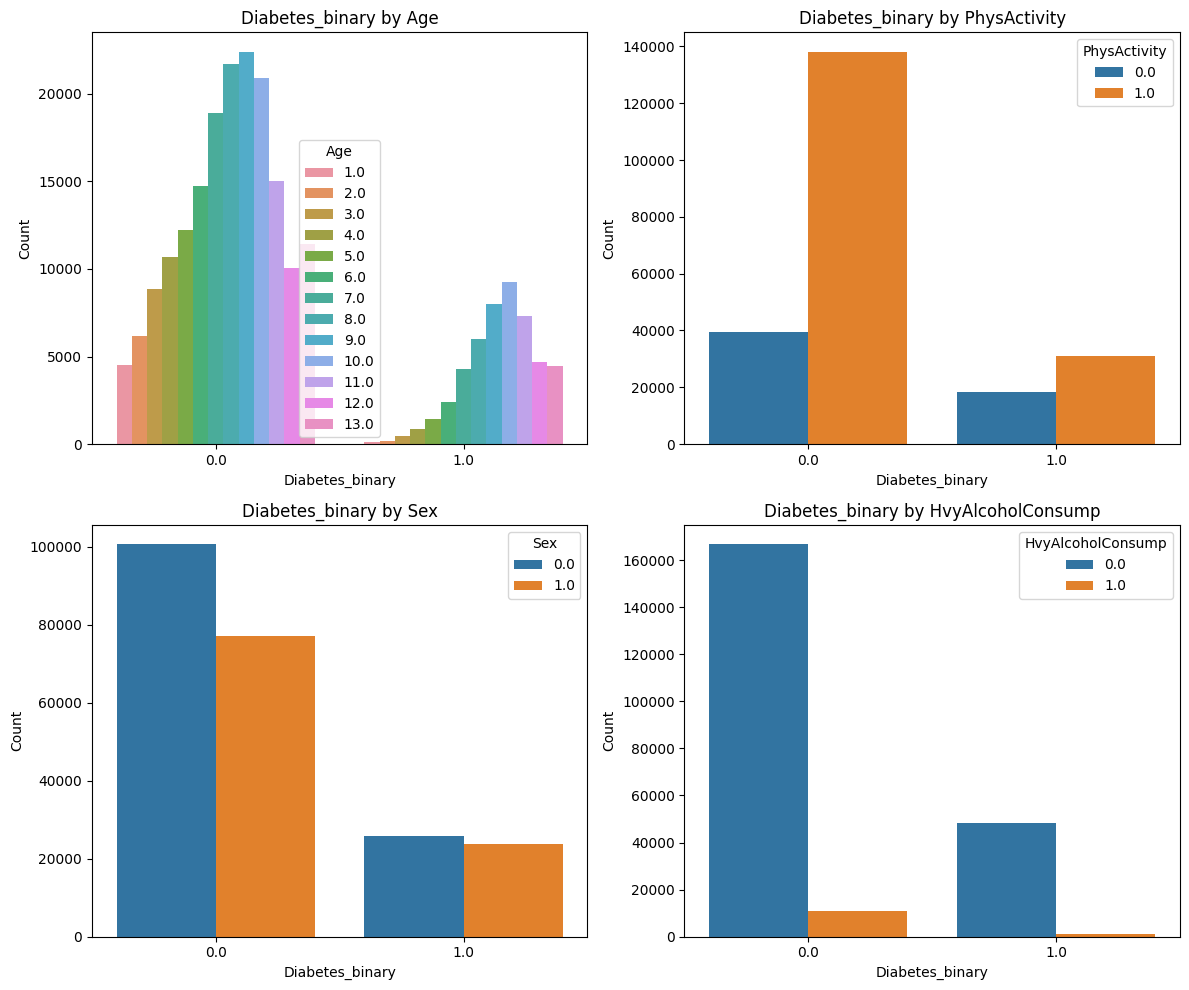

In [ ]:
# Plot the relationship between Diabetes_binary, Age, PhysActivity, Sex, and HvyAlcoholConsump
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.countplot(x='Diabetes_binary', hue='Age', data=train_df, ax=axes[0, 0])
axes[0, 0].set_title('Diabetes_binary by Age')
axes[0, 0].set_xlabel('Diabetes_binary')
axes[0, 0].set_ylabel('Count')
print(train_df.groupby(['Diabetes_binary', 'Age']).size())

sns.countplot(x='Diabetes_binary', hue='PhysActivity', data=train_df, ax=axes[0, 1])
axes[0, 1].set_title('Diabetes_binary by PhysActivity')
axes[0, 1].set_xlabel('Diabetes_binary')
axes[0, 1].set_ylabel('Count')
print(train_df.groupby(['Diabetes_binary', 'PhysActivity']).size())

sns.countplot(x='Diabetes_binary', hue='Sex', data=train_df, ax=axes[1, 0])
axes[1, 0].set_title('Diabetes_binary by Sex')
axes[1, 0].set_xlabel('Diabetes_binary')
axes[1, 0].set_ylabel('Count')
print(train_df.groupby(['Diabetes_binary', 'Sex']).size())

sns.countplot(x='Diabetes_binary', hue='HvyAlcoholConsump', data=train_df, ax=axes[1, 1])
axes[1, 1].set_title('Diabetes_binary by HvyAlcoholConsump')
axes[1, 1].set_xlabel('Diabetes_binary')
axes[1, 1].set_ylabel('Count')
print(train_df.groupby(['Diabetes_binary', 'HvyAlcoholConsump']).size())

plt.tight_layout()
plt.show()


Diabetes_binary has 2 classes. 0 is for no diabetes, and 1 is for prediabetes or diabetes.
Sex F=0  M=0

# Define the binary health indicators

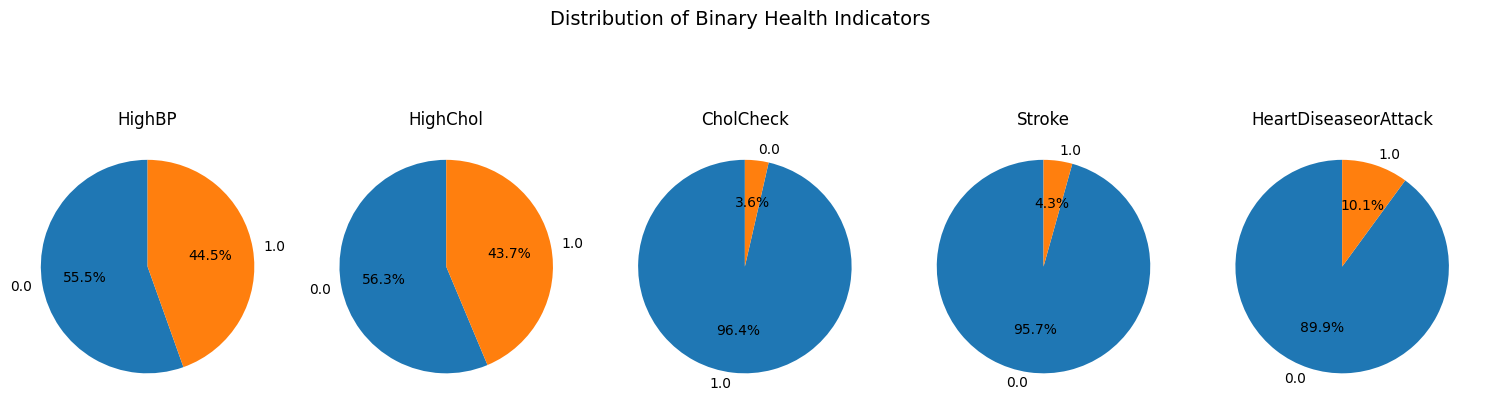

In [ ]:
# Define the binary health indicators
binary_health_indicators = ['HighBP', 'HighChol', 'CholCheck', 'Stroke', 'HeartDiseaseorAttack']

# Plot the distribution of binary health indicators using pie charts
fig, axes = plt.subplots(1, len(binary_health_indicators), figsize=(15, 5))

for i, indicator in enumerate(binary_health_indicators):
    counts = train_df[indicator].value_counts()
    axes[i].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(indicator)

plt.suptitle('Distribution of Binary Health Indicators', fontsize=14)
plt.tight_layout()
plt.show()


# Distribution of binary Sex and PhysActivity

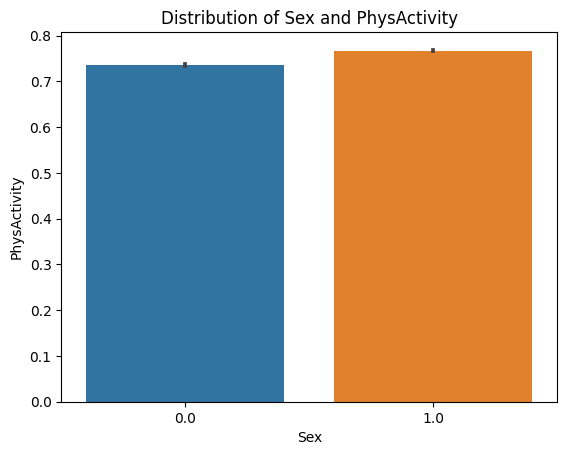

In [ ]:
# Plot the distribution of Sex and PhysActivity
sns.barplot(x='Sex', y='PhysActivity', data=train_df)

# Set labels and title
plt.xlabel('Sex')
plt.ylabel('PhysActivity')
plt.title('Distribution of Sex and PhysActivity')

# Show the plot
plt.show()

# Distribution of Age and PhysActivity


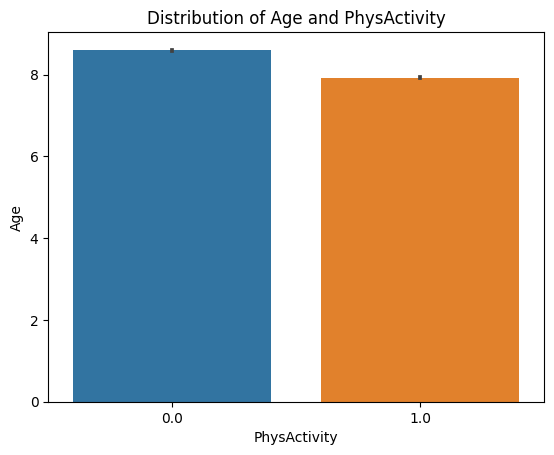

In [ ]:
# Plot the distribution of Age and PhysActivity
sns.barplot(x='PhysActivity', y='Age', data=train_df)

# Set labels and title
plt.xlabel('PhysActivity')
plt.ylabel('Age')
plt.title('Distribution of Age and PhysActivity')

# Show the plot
plt.show()

# Distribution of binary PhysActivity and Diabetes_012

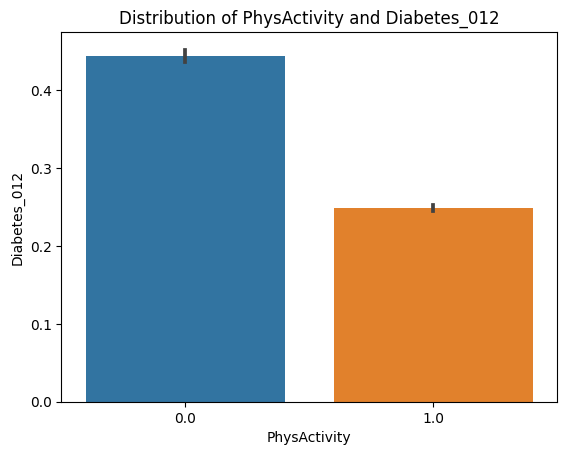

In [ ]:
# Plot the distribution of PhysActivity and Diabetes_012
sns.barplot(x='PhysActivity', y='Diabetes_012', data=train_df)

# Set labels and title
plt.xlabel('PhysActivity')
plt.ylabel('Diabetes_012')
plt.title('Distribution of PhysActivity and Diabetes_012')

# Show the plot
plt.show()


# Distribution of binary HvyAlcoholConsump By Sex

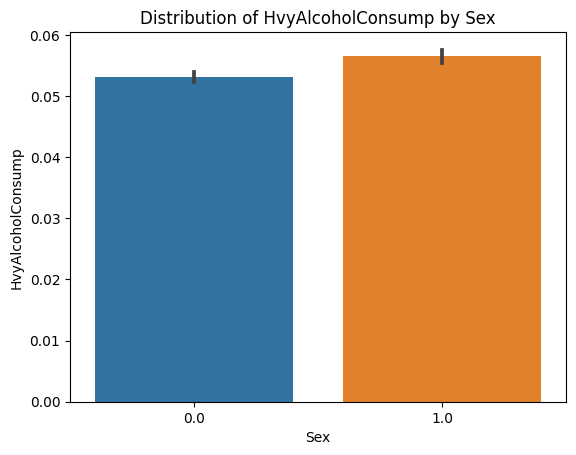

In [ ]:
# Plot the distribution of HvyAlcoholConsump and Diabetes_012
sns.barplot(x='Sex', y='HvyAlcoholConsump', data=train_df)
#sns.barplot(x='HvyAlcoholConsump', y='Sex', data=train_df)

# Set labels and title
plt.xlabel('Sex')
plt.ylabel('HvyAlcoholConsump')
plt.title('Distribution of HvyAlcoholConsump by Sex')

# Show the plot
plt.show()


# Distribution of Diabetes_012 by Physical Activity, Age and Sex

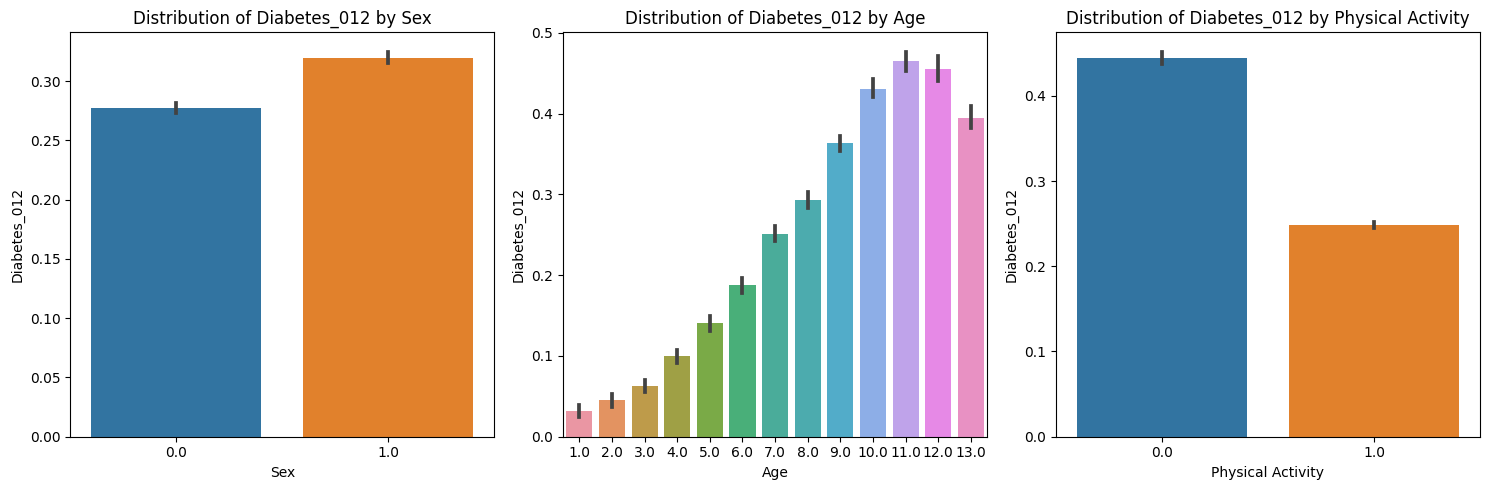

In [ ]:
# Map the values of Diabetes_012 to meaningful categories
train_df['Diabetes_Status'] = train_df['Diabetes_012'].map({0: 'No Diabetes', 1: 'Prediabetes or Diabetes'})

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot distribution of Diabetes_012 by Sex
sns.barplot(x='Sex', y='Diabetes_012', data=train_df, ax=axes[0])
axes[0].set_xlabel('Sex')
axes[0].set_ylabel('Diabetes_012')
axes[0].set_title('Distribution of Diabetes_012 by Sex')

# Plot distribution of Diabetes_012 by Age
sns.barplot(x='Age', y='Diabetes_012', data=train_df, ax=axes[1])
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Diabetes_012')
axes[1].set_title('Distribution of Diabetes_012 by Age')

# Plot distribution of Diabetes_012 by PhysActivity
sns.barplot(x='PhysActivity', y='Diabetes_012', data=train_df, ax=axes[2])
axes[2].set_xlabel('Physical Activity')
axes[2].set_ylabel('Diabetes_012')
axes[2].set_title('Distribution of Diabetes_012 by Physical Activity')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


# Distribution of Diabetes_012 by HvyAlcoholConsump, Age and Sex

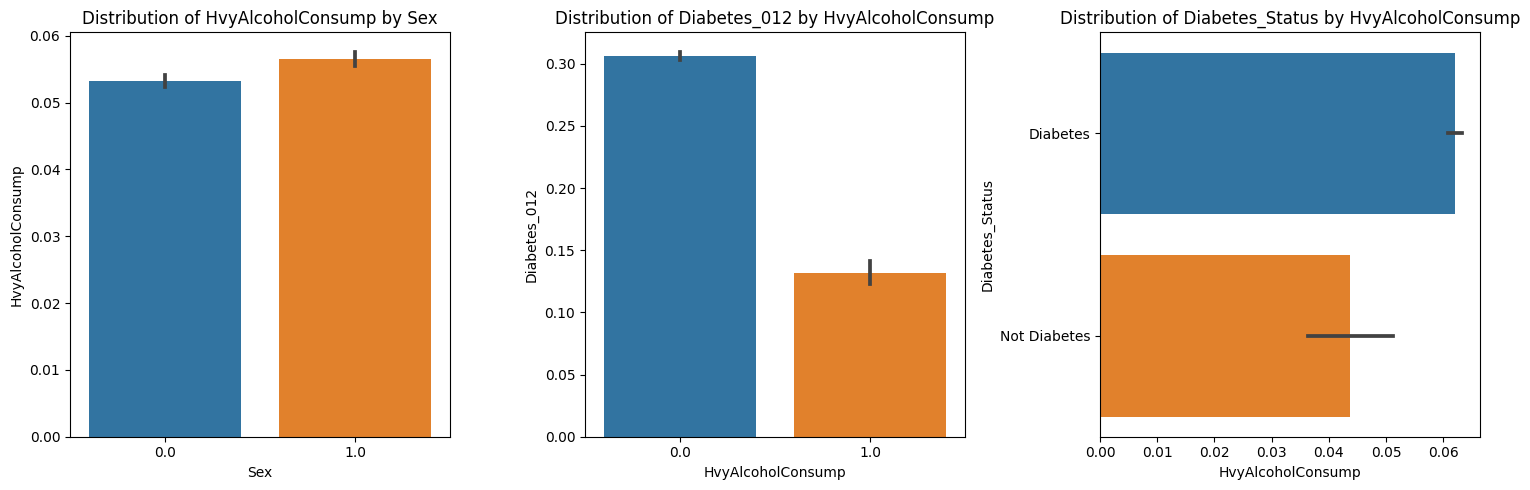

In [ ]:
# Map the values of Diabetes_012 to meaningful categories
train_df['Diabetes_Status'] = train_df['Diabetes_012'].map({0: 'Diabetes', 1: 'Not Diabetes'})

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot distribution of HvyAlcoholConsump by Sex
sns.barplot(x='Sex', y='HvyAlcoholConsump', data=train_df, ax=axes[0])
axes[0].set_xlabel('Sex')
axes[0].set_ylabel('HvyAlcoholConsump')
axes[0].set_title('Distribution of HvyAlcoholConsump by Sex')

# Plot distribution of Diabetes_012 by HvyAlcoholConsump
sns.barplot(x='HvyAlcoholConsump', y='Diabetes_012', data=train_df, ax=axes[1])
axes[1].set_xlabel('HvyAlcoholConsump')
axes[1].set_ylabel('Diabetes_012')
axes[1].set_title('Distribution of Diabetes_012 by HvyAlcoholConsump')

# Plot distribution of Diabetes_Status with respect to HvyAlcoholConsump
sns.barplot(x='HvyAlcoholConsump', y='Diabetes_Status', data=train_df, ax=axes[2])
axes[2].set_xlabel('HvyAlcoholConsump')
axes[2].set_ylabel('Diabetes_Status')
axes[2].set_title('Distribution of Diabetes_Status by HvyAlcoholConsump')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


# Mean Median and STD

In [ ]:
# Group the data by Sex and calculate the statistics
statistics_by_sex = train_df.groupby('Sex')['Diabetes_012'].agg(['mean', 'median', 'std'])

# Print the statistics
print(statistics_by_sex)


         mean  median       std
Sex                            
0.0  0.277700     0.0  0.678062
1.0  0.319915     0.0  0.720776


In [ ]:
# Group the data by Age and calculate the statistics
statistics_by_age = train_df.groupby('Age')['Diabetes_012'].agg(['mean', 'median', 'std'])

# Print the statistics
print(statistics_by_age)

          mean  median       std
Age                             
1.0   0.032111     0.0  0.242710
2.0   0.045120     0.0  0.285315
3.0   0.062284     0.0  0.336769
4.0   0.099381     0.0  0.423093
5.0   0.140362     0.0  0.501602
6.0   0.187329     0.0  0.569244
7.0   0.251118     0.0  0.650453
8.0   0.293095     0.0  0.694214
9.0   0.363201     0.0  0.757742
10.0  0.431007     0.0  0.809414
11.0  0.464732     0.0  0.829134
12.0  0.455088     0.0  0.821150
13.0  0.395159     0.0  0.779451


In [ ]:
# Group the data by HvyAlcoholConsump and calculate the statistics
statistics_by_alcohol = train_df.groupby('HvyAlcoholConsump')['Diabetes_012'].agg(['mean', 'median', 'std'])

# Print the statistics
print(statistics_by_alcohol)


                       mean  median       std
HvyAlcoholConsump                            
0.0                0.306115     0.0  0.707109
1.0                0.131855     0.0  0.481833


In [ ]:
# Group the data by PhysActivity and calculate the statistics
statistics_by_activity = train_df.groupby('PhysActivity')['Diabetes_012'].agg(['mean', 'median', 'std'])

# Print the statistics
print(statistics_by_activity)


                  mean  median       std
PhysActivity                            
0.0           0.444455     0.0  0.816689
1.0           0.248655     0.0  0.647437


# plot : Mean, median, and standard

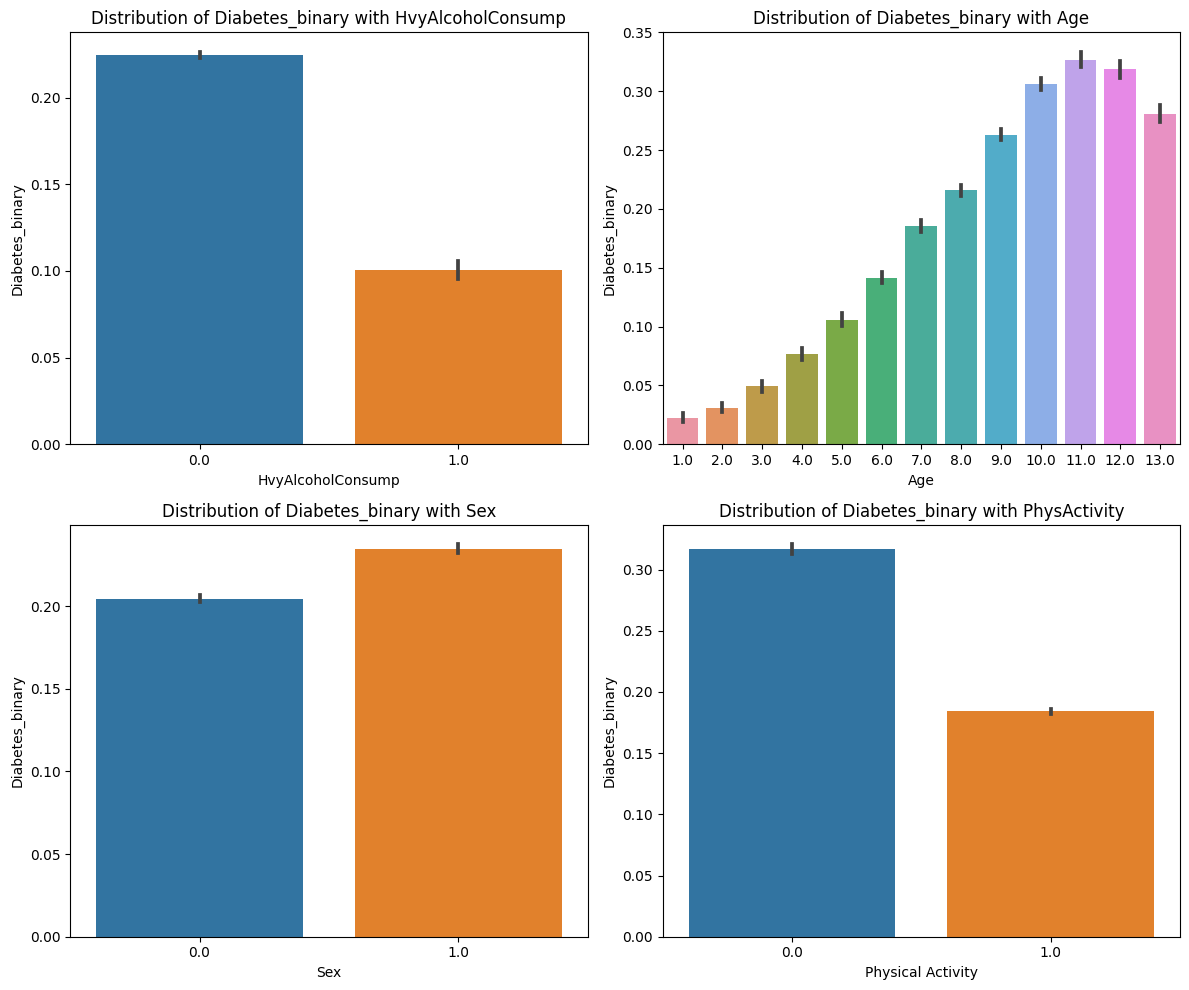

In [ ]:
# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot mean, median, and standard deviation for Diabetes_binary with HvyAlcoholConsump
sns.barplot(x='HvyAlcoholConsump', y='Diabetes_binary', data=train_df, ax=axes[0, 0])
axes[0, 0].set_xlabel('HvyAlcoholConsump')
axes[0, 0].set_ylabel('Diabetes_binary')
axes[0, 0].set_title('Distribution of Diabetes_binary with HvyAlcoholConsump')

# Plot mean, median, and standard deviation for Diabetes_binary with Age
sns.barplot(x='Age', y='Diabetes_binary', data=train_df, ax=axes[0, 1])
axes[0, 1].set_xlabel('Age')
axes[0, 1].set_ylabel('Diabetes_binary')
axes[0, 1].set_title('Distribution of Diabetes_binary with Age')

# Plot mean, median, and standard deviation for Diabetes_binary with Sex
sns.barplot(x='Sex', y='Diabetes_binary', data=train_df, ax=axes[1, 0])
axes[1, 0].set_xlabel('Sex')
axes[1, 0].set_ylabel('Diabetes_binary')
axes[1, 0].set_title('Distribution of Diabetes_binary with Sex')

# Plot mean, median, and standard deviation for Diabetes_binary with PhysActivity
sns.barplot(x='PhysActivity', y='Diabetes_binary', data=train_df, ax=axes[1, 1])
axes[1, 1].set_xlabel('Physical Activity')
axes[1, 1].set_ylabel('Diabetes_binary')
axes[1, 1].set_title('Distribution of Diabetes_binary with PhysActivity')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


## Diabetes_012 with HvyAlcoholConsump, Age, Sex, and PhysActivity

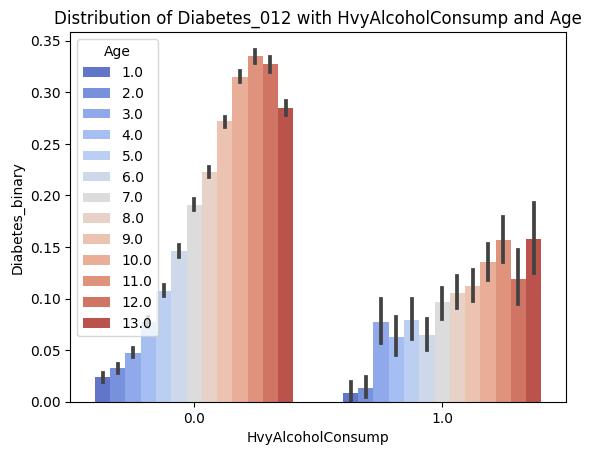

In [ ]:
# Create a bar plot with color encoding for Diabetes_012 with HvyAlcoholConsump, Age, Sex, and PhysActivity
sns.barplot(x='HvyAlcoholConsump', y='Diabetes_binary', hue='Age', data=train_df, palette='coolwarm')
plt.xlabel('HvyAlcoholConsump')
plt.ylabel('Diabetes_binary')
plt.title('Distribution of Diabetes_012 with HvyAlcoholConsump and Age')

# Adjust the legend position
plt.legend(title='Age', loc='best')

# Show the plot
plt.show()


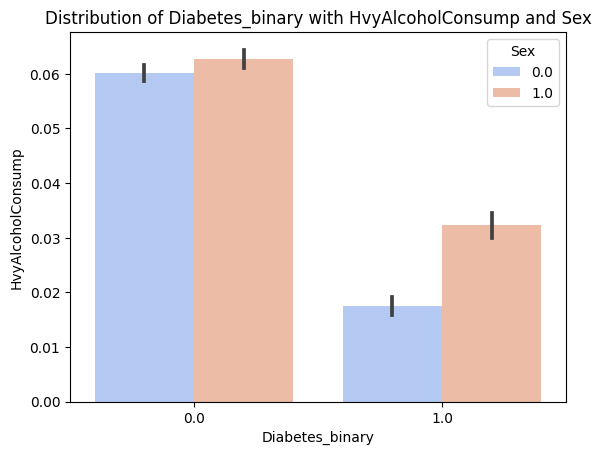

In [ ]:
# Create a bar plot with color encoding for Diabetes_binary with HvyAlcoholConsump and Sex
sns.barplot(x='Diabetes_binary', y='HvyAlcoholConsump', hue='Sex', data=train_df, palette='coolwarm')
plt.xlabel('Diabetes_binary')
plt.ylabel('HvyAlcoholConsump')
plt.title('Distribution of Diabetes_binary with HvyAlcoholConsump and Sex')

# Adjust the legend position
plt.legend(title='Sex', loc='best')

# Show the plot
plt.show()


Diabetes_binary has 2 classes. 0 is for no diabetes, and 1 is for prediabetes or diabetes.